In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bing_helper import load_json_files, get_hits_from_json, load_lang_news_hits
from regression import fit_regression_and_rename_coeffs_by_cat, fit_regression_and_rename_coeffs, write_reg_results
from processing import filter_by_region_cat_code, build_regression_dataframe, load_preprocessed_events
from plot_regression import plot_regression_results, plot_regression_results_interactions, plot_country_counts, plot_regression_results_interactions_from_dict

%load_ext autoreload
%autoreload 2

/home/ruptho/.local/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## load Data


In [2]:
df_crawled = load_preprocessed_events()
data = build_regression_dataframe(df_crawled)
df_crawled.head()

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,code,bing_hits,gni_class,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd
0,Q100021,Pakistan International Airlines Flight 661,2016-12-07,Global South,Pakistan,Asia,disaster,"['Category:2016 disasters in Pakistan', 'Categ...",248274,0.000000,...,en,11,LM,South Asia,203631356,Pakistan,2016,1362.860008,2.775210e+11,False
1,Q100231328,Gretchen Whitmer kidnapping plot,2020-10-08,Global North,United States,North America,disaster,"['Category:2020 crimes in the United States', ...",74144,0.000000,...,en,6670,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
2,Q100256872,Killing of Babu Lal Vaishnav,2020-10-08,Global South,India,Asia,disaster,"['Category:2020 crimes in India', 'Category:20...",427,0.000000,...,en,33,LM,South Asia,1380004385,India,2020,1930.971218,2.664749e+12,False
3,Q100279235,Miss Vietnam 2020,2020-11-20,Global South,Vietnam,Asia,culture,"['Category:2020 beauty pageants', 'Category:Be...",1444,49.285714,...,en,44300,LM,East Asia & Pacific,97338583,Vietnam,2020,2785.724225,2.711584e+11,False
4,Q100288161,2020 Ganja missile attacks,2020-10-11,Global South,Azerbaijan,Asia,disaster,"['Category:2020 in Azerbaijan', 'Category:Arti...",7410,0.000000,...,en,237000,UM,Europe & Central Asia,10093121,Azerbaijan,2020,4202.232239,4.260718e+10,False


In [ ]:
df_crawled = load_views()

# Analyze Outliers

## Elections in Africa

In [3]:
# Ghanaian general election vs. italian and united kingdom election.
# According to this data, some of the african elections actually get a fair amount of traction.
#https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=1&start=2018-01-26&end=2021-02-15&pages=2019_United_Kingdom_general_election%7C2019_Canadian_federal_election%7C2018_Mexican_general_election%7C2018_Italian_general_election%7CSeptember_2019_Israeli_legislative_election%7C2019_Nigerian_general_election%7C2020_Ghanaian_general_election
# ES:
# https://pageviews.toolforge.org/?project=es.wikipedia.org&platform=all-access&agent=user&redirects=1&start=2018-01-26&end=2021-02-15&pages=Elecciones_generales_del_Reino_Unido_de_2019%7CElecciones_federales_de_Canad%C3%A1_de_2019%7CElecciones_federales_de_M%C3%A9xico_de_2018%7CElecciones_generales_de_Italia_de_2018%7CElecciones_parlamentarias_de_Israel_de_septiembre_de_2019%7CElecciones_generales_de_Nigeria_de_2019%7CElecciones_generales_de_Ghana_de_2020

# DE:
#https://pageviews.toolforge.org/?project=de.wikipedia.org&platform=all-access&agent=user&redirects=1&start=2018-01-26&end=2021-02-15&pages=Britische_Unterhauswahl_2019%7CKanadische_Unterhauswahl_2019%7CBundeswahlen_in_Mexiko_2018%7CParlamentswahlen_in_Italien_2018%7CParlamentswahl_in_Israel_September_2019%7CWahlen_in_Nigeria_2019

# IT
# https://pageviews.toolforge.org/?project=it.wikipedia.org&platform=all-access&agent=user&redirects=1&start=2018-01-26&end=2020-07-13&pages=Elezioni_generali_nel_Regno_Unito_del_2019%7CElezioni_federali_in_Canada_del_2019%7CElezioni_presidenziali_in_Messico_del_2018%7CElezioni_politiche_in_Italia_del_2018%7C%7CElezioni_parlamentari_in_Israele_del_settembre_2019%7CElezioni_generali_in_Nigeria_del_2019

In [6]:
filter_by_region_cat_code(df_crawled, 'North America', 'politics', 'en', 10)

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,code,bing_hits,gni_class,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd
1268,Q22923830,2020 United States presidential election,2020-11-03,Global North,United States,North America,politics,['Category:2020 United States presidential ele...,7847440,186775.857143,...,en,15,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
6537,Q699872,2016 United States presidential election,2016-11-08,Global North,United States,North America,politics,['Category:2016 United States presidential ele...,5580333,108.714286,...,en,11,H,North America,323071755,United States,2016,57876.719077,1.869511e+13,True
4533,Q48977345,2020 Iowa Democratic presidential caucuses,2020-02-03,Global North,United States,North America,politics,"['Category:2020 Iowa elections', 'Category:202...",1047899,0.000000,...,en,15,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
1699,Q24190721,2019 Canadian federal election,2019-10-21,Global North,Canada,North America,politics,"['Category:2019 Canadian federal election', 'C...",1005614,42175.142857,...,en,62600,H,North America,37593384,Canada,2019,46550.335507,1.741497e+12,True
6752,Q7892468,2018 United States elections,2018-11-06,Global North,United States,North America,politics,['Category:2018 elections in the United States...,968498,32.857143,...,en,17,H,North America,326838199,United States,2018,62755.711992,2.052716e+13,True
3741,Q38051551,2020 Democratic Party presidential primaries,2020-02-03,Global North,United States,North America,politics,"['Category:2019-related timelines', 'Category:...",706804,40094.857143,...,en,13,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
5559,Q60519474,2020 United States presidential election in Ne...,2020-11-03,Global North,United States,North America,politics,"['Category:2020 Nevada elections', 'Category:2...",693432,1366.714286,...,en,14,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
5544,Q60519437,2020 United States presidential election in Ge...,2020-11-03,Global North,United States,North America,politics,['Category:2020 Georgia (U.S. state) elections...,680687,3255.428571,...,en,11,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True
3709,Q3586271,2015 Canadian federal election,2015-10-19,Global North,Canada,North America,politics,"['Category:2015 Canadian federal election', 'C...",565288,343.428571,...,en,25500,H,North America,35702908,Canada,2015,43193.791806,1.556129e+12,True
6288,Q65056441,2020 Nevada Democratic presidential caucuses,2020-02-22,Global North,United States,North America,politics,"['Category:2020 Nevada elections', 'Category:2...",549880,0.000000,...,en,15,H,North America,329484123,United States,2020,63122.594145,2.089375e+13,True


In [206]:
filter_by_region_cat_code(df_crawled, 'Sub-Saharan Africa', 'politics', 'en', 10)

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region,views_diff_sum
4082,Q43172549,2017 Zimbabwean coup d'état,2017-11-14,Global South,Zimbabwe,Africa,politics,"[""Category:2010s coups d'état and coup attempt...",292838,0.000000,...,Sub-Saharan Africa,14236599,Zimbabwe,2017,1548.186368,2.204090e+10,False,True,False,292838
6872,Q84031280,2020 Ghanaian general election,2020-12-07,Global South,Ghana,Africa,politics,"['Category:2020 elections in Africa', 'Categor...",243305,2447.000000,...,Sub-Saharan Africa,31072945,Ghana,2020,2205.526086,6.853218e+10,False,True,False,226176
449,Q19623664,2019 South African general election,2019-05-08,Global South,South Africa,Africa,politics,"['Category:2019 elections in Africa', 'Categor...",181284,5746.142857,...,Sub-Saharan Africa,58558267,South Africa,2019,6001.389576,3.514310e+11,False,True,False,141061
3461,Q30594192,2019 Nigerian general election,2019-02-23,Global South,Nigeria,Africa,politics,"['Category:2019 Nigerian general election', 'C...",168807,6418.142857,...,Sub-Saharan Africa,200963603,Nigeria,2019,2361.206967,4.745167e+11,False,True,False,123880
2665,Q28053637,2017 Somali presidential election,2017-02-08,Global South,Somalia,Africa,politics,"['Category:2017 elections in Africa', 'Categor...",92546,0.000000,...,Sub-Saharan Africa,14589165,Somalia,2017,111.048078,1.620100e+09,False,False,False,92546
1477,Q23058296,2018 Zimbabwean general election,2018-07-30,Global South,Zimbabwe,Africa,politics,"['Category:2018 elections in Africa', 'Categor...",87317,0.000000,...,Sub-Saharan Africa,14438812,Zimbabwe,2018,1683.765768,2.431156e+10,False,True,False,87317
5948,Q63096026,2019 Sudanese coup d'état,2019-04-11,Global South,Sudan,Africa,politics,"[""Category:2010s coups d'état and coup attempt...",81330,0.000000,...,Sub-Saharan Africa,42813237,Sudan,2019,815.060101,3.489536e+10,False,True,False,81330
2715,Q28128006,2017 Kenyan general election,2017-08-08,Global South,Kenya,Africa,politics,"['Category:2017 elections in Africa', 'Categor...",79547,0.000000,...,Sub-Saharan Africa,50221146,Kenya,2017,1634.068744,8.206480e+10,False,True,False,79547
302,Q18344384,2016 Ghanaian general election,2016-12-07,Global South,Ghana,Africa,politics,"['Category:2016 elections in Africa', 'Categor...",70023,0.000000,...,Sub-Saharan Africa,28481947,Ghana,2016,1971.957073,5.616517e+10,False,True,False,70023
5517,Q60474140,2019 Gabonese coup d'état attempt,2019-01-07,Global South,Gabon,Africa,politics,"[""Category:2010s coups d'état and coup attempt...",57903,0.000000,...,Sub-Saharan Africa,2172578,Gabon,2019,7766.992804,1.687441e+10,False,False,False,57903


In [8]:
filter_by_region_cat_code(df_crawled, 'Europe & Central Asia', 'politics', 'de', 10)

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,code,bing_hits,gni_class,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd
8210,Q26810500,G20-Gipfel in Hamburg 2017,2017-07-07,Global North,Germany,Europe,politics,['Kategorie:Deutschland im 21. Jahrhundert (Po...,570161,38617.000000,...,de,2620,H,Europe & Central Asia,82657002,Germany,2017,44651.829102,3.690849e+12,True
8330,Q15062956,Bundestagswahl 2017,2017-09-24,Global North,Germany,Europe,politics,"['Kategorie:Angela Merkel', 'Kategorie:Bundest...",500938,17733.285714,...,de,46400,H,Europe & Central Asia,82657002,Germany,2017,44651.829102,3.690849e+12,True
8764,Q19833920,Landtagswahl in Bayern 2018,2018-10-14,Global North,Germany,Europe,politics,"['Kategorie:Landtagswahl in Bayern', 'Kategori...",299419,12932.428571,...,de,3890,H,Europe & Central Asia,82905782,Germany,2018,47847.426197,3.977289e+12,True
9129,Q40194748,Bürgerschaftswahl in Hamburg 2020,2020-02-23,Global North,Germany,Europe,politics,"['Kategorie:Bürgerschaftswahl in Hamburg', 'Ka...",231483,4253.285714,...,de,32100,H,Europe & Central Asia,83240525,Germany,2020,45908.724713,3.846414e+12,True
9053,Q19288817,Landtagswahl in Thüringen 2019,2019-10-27,Global North,Germany,Europe,politics,"['Kategorie:Bodo Ramelow', 'Kategorie:Landtags...",219927,2908.571429,...,de,5810,H,Europe & Central Asia,83092962,Germany,2019,46557.284069,3.888327e+12,True
8915,Q41622210,Europawahl in Deutschland 2019,2019-05-26,Global North,Germany,Europe,politics,"['Kategorie:Europawahl 2019', 'Kategorie:Europ...",215847,19214.000000,...,de,1120,H,Europe & Central Asia,83092962,Germany,2019,46557.284069,3.888327e+12,True
7810,Q19912815,Landtagswahl in Mecklenburg-Vorpommern 2016,2016-09-04,Global North,Germany,Europe,politics,"['Kategorie:Erwin Sellering', 'Kategorie:Landt...",206929,5861.000000,...,de,2290,H,Europe & Central Asia,82348669,Germany,2016,42186.872393,3.467498e+12,True
7753,Q25906338,Putschversuch in der Türkei 2016,2016-07-15,Global North,Turkey,Asia,politics,"['Kategorie:Konflikt 2016', 'Kategorie:Militär...",203944,0.000000,...,de,2070,UM,Europe & Central Asia,79827868,Turkey,2016,10894.477623,8.696830e+11,True
8775,Q23558888,Landtagswahl in Hessen 2018,2018-10-28,Global North,Germany,Europe,politics,"['Kategorie:Landtagswahl in Hessen', 'Kategori...",177242,9229.285714,...,de,3030,H,Europe & Central Asia,82905782,Germany,2018,47847.426197,3.977289e+12,True
8137,Q1804132,Landtagswahl in Nordrhein-Westfalen 2017,2017-05-14,Global North,Germany,Europe,politics,['Kategorie:Geschichte Nordrhein-Westfalens (2...,157862,10216.714286,...,de,3040,H,Europe & Central Asia,82657002,Germany,2017,44651.829102,3.690849e+12,True


## Disasters in Espanol

Makes actually sense. EU + LatAmerica is focus of spanish Wikipedia. Surprising is focus on Middle east

In [204]:
list(df_crawled.gni_region.unique())

['South Asia',
 'North America',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'Middle East & North Africa']

In [212]:
filter_by_region_cat_code(df_crawled, 'Middle East & North Africa', 'disaster', 'es')

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region,views_diff_sum
14052,Q98073118,Explosiones en el puerto de Beirut de 2020,2020-08-04,Global South,Lebanon,Asia,disaster,"['Categoría:Desastres en 2020', 'Categoría:Des...",119746,0.0,...,Middle East & North Africa,6825442,Lebanon,2020,9310.161925,6.354600e+10,False,False,False,119746
13904,Q80754846,Ataque aéreo en el Aeropuerto Internacional de...,2020-01-03,Global South,Iraq,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",40794,0.0,...,Middle East & North Africa,40222503,Iraq,2020,4145.863967,1.667570e+11,False,False,False,40794
13925,Q81360866,Vuelo 752 de Ukraine International Airlines,2020-01-08,Global South,Iran,Asia,disaster,['Categoría:Accidentes e incidentes aéreos de ...,22960,0.0,...,Middle East & North Africa,83992953,Iran,2020,11183.274877,9.393162e+11,False,False,False,22960
12274,Q29154471,Ataque químico de Jan Sheijun,2017-04-04,Global South,Syria,Asia,disaster,"['Categoría:Controversias historiográficas', '...",17566,0.0,...,Middle East & North Africa,17095669,Syria,2017,987.609929,1.688386e+10,False,False,False,17566
12278,Q29197866,Bombardeo de Shayrat,2017-04-07,Global South,Syria,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",17215,0.0,...,Middle East & North Africa,17095669,Syria,2017,987.609929,1.688386e+10,False,False,False,17215
11439,Q21282782,Vuelo 9268 de Metrojet,2015-10-31,Global South,Egypt,Africa,disaster,['Categoría:Accidentes e incidentes aéreos de ...,16601,0.0,...,Middle East & North Africa,92442549,Egypt,2015,3437.211230,3.177446e+11,False,False,False,16601
12973,Q51844684,Bombardeos de Damasco y Homs,2018-04-14,Global South,Syria,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",9216,0.0,...,Middle East & North Africa,16945062,Syria,2018,1303.775531,2.209255e+10,False,False,False,9216
12795,Q47465940,Operación Rama de Olivo,2018-01-20,Global South,Syria,Asia,disaster,"['Categoría:Conflictos en 2018', 'Categoría:Li...",7912,0.0,...,Middle East & North Africa,16945062,Syria,2018,1303.775531,2.209255e+10,False,False,False,7912
12664,Q43041167,Terremoto de Kermanshah de 2017,2017-11-12,Global South,Iran,Asia,disaster,"['Categoría:Irak en 2017', 'Categoría:Irán en ...",7461,0.0,...,Middle East & North Africa,80673888,Iran,2017,6243.780412,5.037100e+11,False,False,False,7461
12282,Q29297504,Atentados del Domingo de Ramos de Egipto de 2017,2017-04-09,Global South,Egypt,Africa,disaster,['Categoría:Atentados del terrorismo islámico ...,7421,0.0,...,Middle East & North Africa,96442590,Egypt,2017,2023.331158,1.951353e+11,False,False,False,7421


In [209]:
filter_by_region_cat_code(df_crawled, 'Middle East & North Africa', 'disaster', 'es')

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region,views_diff_sum
14052,Q98073118,Explosiones en el puerto de Beirut de 2020,2020-08-04,Global South,Lebanon,Asia,disaster,"['Categoría:Desastres en 2020', 'Categoría:Des...",119746,0.0,...,Middle East & North Africa,6825442,Lebanon,2020,9310.161925,6.354600e+10,False,False,False,119746
13904,Q80754846,Ataque aéreo en el Aeropuerto Internacional de...,2020-01-03,Global South,Iraq,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",40794,0.0,...,Middle East & North Africa,40222503,Iraq,2020,4145.863967,1.667570e+11,False,False,False,40794
13925,Q81360866,Vuelo 752 de Ukraine International Airlines,2020-01-08,Global South,Iran,Asia,disaster,['Categoría:Accidentes e incidentes aéreos de ...,22960,0.0,...,Middle East & North Africa,83992953,Iran,2020,11183.274877,9.393162e+11,False,False,False,22960
12274,Q29154471,Ataque químico de Jan Sheijun,2017-04-04,Global South,Syria,Asia,disaster,"['Categoría:Controversias historiográficas', '...",17566,0.0,...,Middle East & North Africa,17095669,Syria,2017,987.609929,1.688386e+10,False,False,False,17566
12278,Q29197866,Bombardeo de Shayrat,2017-04-07,Global South,Syria,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",17215,0.0,...,Middle East & North Africa,17095669,Syria,2017,987.609929,1.688386e+10,False,False,False,17215
11439,Q21282782,Vuelo 9268 de Metrojet,2015-10-31,Global South,Egypt,Africa,disaster,['Categoría:Accidentes e incidentes aéreos de ...,16601,0.0,...,Middle East & North Africa,92442549,Egypt,2015,3437.211230,3.177446e+11,False,False,False,16601
12973,Q51844684,Bombardeos de Damasco y Homs,2018-04-14,Global South,Syria,Asia,disaster,"['Categoría:Administración Trump', 'Categoría:...",9216,0.0,...,Middle East & North Africa,16945062,Syria,2018,1303.775531,2.209255e+10,False,False,False,9216
12795,Q47465940,Operación Rama de Olivo,2018-01-20,Global South,Syria,Asia,disaster,"['Categoría:Conflictos en 2018', 'Categoría:Li...",7912,0.0,...,Middle East & North Africa,16945062,Syria,2018,1303.775531,2.209255e+10,False,False,False,7912
12664,Q43041167,Terremoto de Kermanshah de 2017,2017-11-12,Global South,Iran,Asia,disaster,"['Categoría:Irak en 2017', 'Categoría:Irán en ...",7461,0.0,...,Middle East & North Africa,80673888,Iran,2017,6243.780412,5.037100e+11,False,False,False,7461
12282,Q29297504,Atentados del Domingo de Ramos de Egipto de 2017,2017-04-09,Global South,Egypt,Africa,disaster,['Categoría:Atentados del terrorismo islámico ...,7421,0.0,...,Middle East & North Africa,96442590,Egypt,2017,2023.331158,1.951353e+11,False,False,False,7421


In [196]:
filter_by_region_cat_code(df_crawled, 'Middle East & North Africa', 'culture', 'es')

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region,views_diff_sum


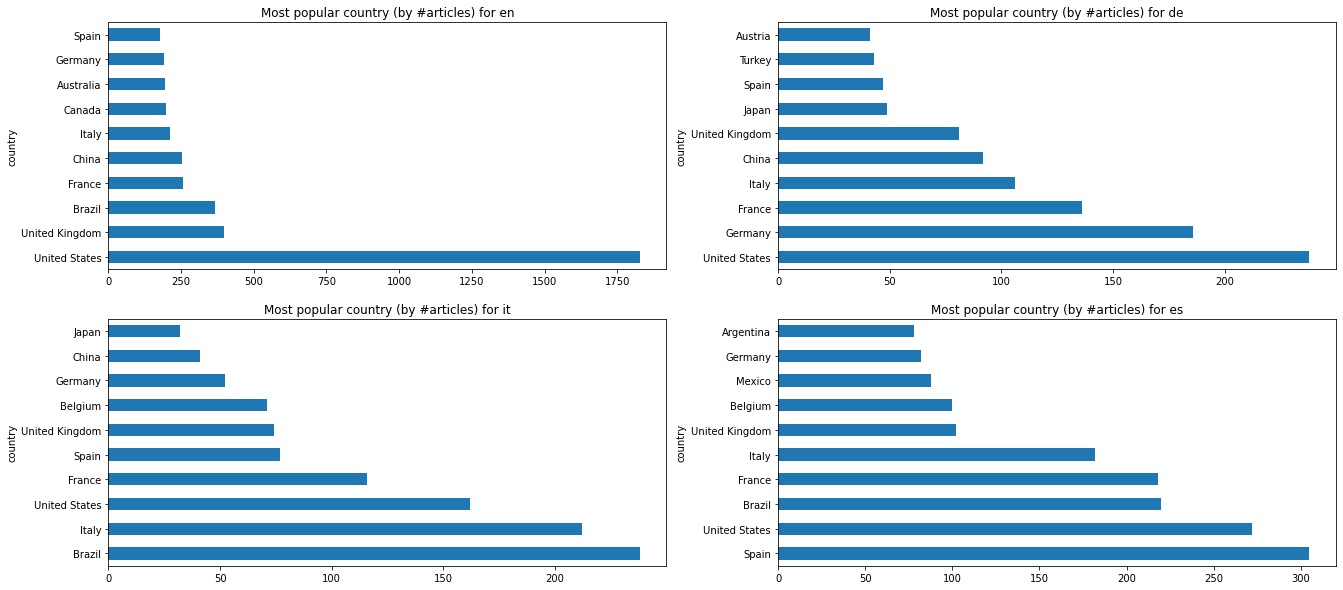

In [263]:
fig_counts = plot_country_counts(df_crawled[df_crawled.views_7_sum > 10])
fig_counts.savefig('top_countries.pdf')

In [253]:
df_crawled[(df_crawled.country == 'Brazil') & (df_crawled.pagetitle.str.contains('Ol'))].code.value_counts()

en    274
it    208
es    150
de      3
Name: code, dtype: int64

## undefined articles

In [11]:
df_crawled[df_crawled.cat == 'undefined'].sort_values('views_7_sum', ascending=False)

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,code,bing_hits,gni_class,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd
135,Q1437630,"Solar eclipse of August 21, 2017",2017-08-21,Global North,United States,North America,undefined,"['Category:2017 in science', 'Category:2017 in...",1244878,157979.285714,...,en,75,H,North America,325122128,United States,2017,59921.674703,1.947962e+13,True
11100,Q1437630,Eclipse solar del 21 de agosto de 2017,2017-08-21,Global North,United States,North America,undefined,"['Categoría:Ciencia de 2017', 'Categoría:Colom...",232673,20735.142857,...,es,19100,H,North America,325122128,United States,2017,59921.674703,1.947962e+13,True
5826,Q6155802,January 2019 lunar eclipse,2019-01-21,Global South,Ecuador,South America,undefined,"['Category:2019 in science', 'Category:21st-ce...",141506,19051.142857,...,en,10400,UM,Latin America & Caribbean,17373657,Ecuador,2019,6222.522862,1.081080e+11,False
13528,Q6155802,Eclipse lunar de enero de 2019,2019-01-21,Global South,Ecuador,South America,undefined,"['Categoría:2019', 'Categoría:Chile en 2019', ...",114555,7644.142857,...,es,72800,UM,Latin America & Caribbean,17373657,Ecuador,2019,6222.522862,1.081080e+11,False
8279,Q1437630,Sonnenfinsternis vom 21. August 2017,2017-08-21,Global North,United States,North America,undefined,"['Kategorie:Ereignis 2017', 'Kategorie:Sonnenf...",74432,5254.714286,...,de,15800,H,North America,325122128,United States,2017,59921.674703,1.947962e+13,True
4306,Q47510319,Battle of Aden (2018),2018-01-28,Global South,Yemen,Asia,undefined,"['Category:2018 in Yemen', 'Category:21st cent...",66656,0.000000,...,en,74,L,Middle East & North Africa,28498683,Yemen,2018,803.648964,2.290294e+10,False
7071,Q88008282,Janata Curfew,2020-03-22,Global South,India,Asia,undefined,['Category:Redirects connected to a Wikidata i...,63166,12150.333333,...,en,6710,LM,South Asia,1380004385,India,2020,1930.971218,2.664749e+12,False
4110,Q44407676,Battle of Sanaa (2017),2017-11-29,Global South,Yemen,Asia,undefined,"['Category:2017 in Yemen', 'Category:21st cent...",31289,0.000000,...,en,60,L,Middle East & North Africa,27834811,Yemen,2017,745.087677,2.073938e+10,False
9284,Q1437630,Eclissi solare del 21 agosto 2017,2017-08-21,Global North,United States,North America,undefined,"['Categoria:Eclissi solari', 'Categoria:Eventi...",30930,3612.285714,...,it,10000,H,North America,325122128,United States,2017,59921.674703,1.947962e+13,True
12822,Q47510319,Batalla de Adén (2018),2018-01-28,Global South,Yemen,Asia,undefined,"['Categoría:Adén', 'Categoría:Conflictos en 20...",8006,0.000000,...,es,42000,L,Middle East & North Africa,28498683,Yemen,2018,803.648964,2.290294e+10,False


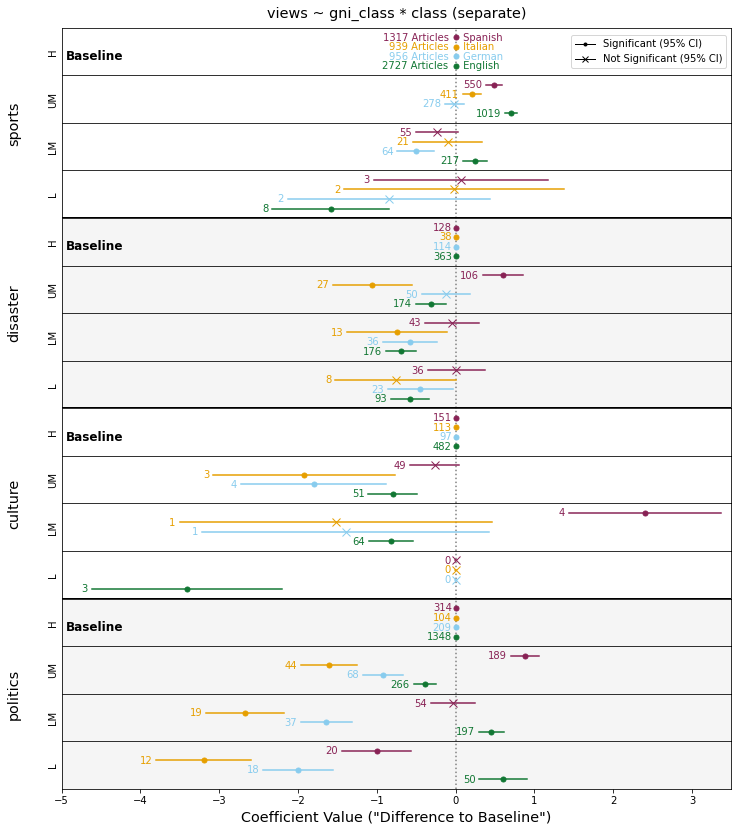

In [184]:
data_filtered = data[(data.views_7_sum >= np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate = fit_regression_and_rename_coeffs_by_cat(data_filtered, formula="views_7_sum ~ C(cat, Treatment(reference='sports')) * C(gni_class, Treatment(reference='H'))")

fig_int_class_cat4 = plot_regression_results_interactions_from_dict(data_filtered,
                                                                    results_fit_separate, ['cat:gni_class'],
                                                                    {'gni_class': 'H', 'in_code_lang': True,
                                                                     'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                                    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                                    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='views ~ gni_class * class (separate)',
                                                                    figsize=(12, 14), x_limits=(-5,3.5), include_counts=True)
fig_int_class_cat4.savefig('regression_plot_interaction_classcat_counts_sep.pdf')

In [167]:
(data_filtered.code.value_counts(), len(data_filtered))

(en    7042
 es    2653
 de    1784
 it    1359
 Name: code, dtype: int64,
 12838)

In [ ]:
(data_filtered.code.value_counts(), len(data_filtered))

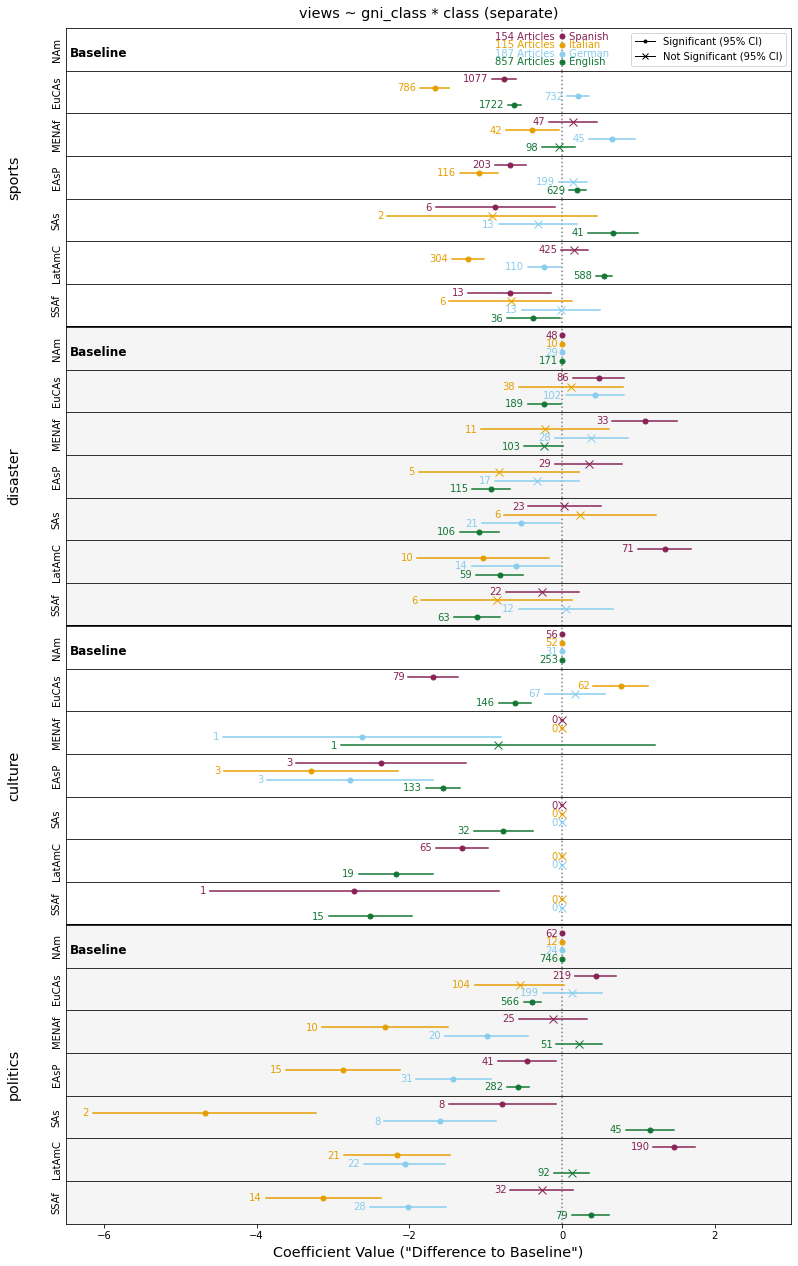

In [183]:
data_filtered = data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate = fit_regression_and_rename_coeffs_by_cat(data_filtered, formula="views_7_sum ~C(cat, Treatment(reference='sports')) * C(gni_region, Treatment(reference='North America'))")

fig_int_class_cat3 = plot_regression_results_interactions_from_dict(data_filtered,
                                                                    results_fit_separate, ['cat:gni_region'],
                                                                    {'gni_class': 'H', 'in_code_lang': True,
                                                                     'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},

                                                                    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                'cat': ['sports', 'disaster', 'culture', 'politics'], 'gni_region': ['North America', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
                                                                    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='views ~ gni_class * class (separate)',
                                                                    label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC',
                                                                                       'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm',
                                                                                       'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
                                                                    figsize=(13, 22), x_limits=(-6.5,3), include_counts=True)
fig_int_class_cat3.savefig('regression_plot_interaction_regioncat_counts_sep.pdf')

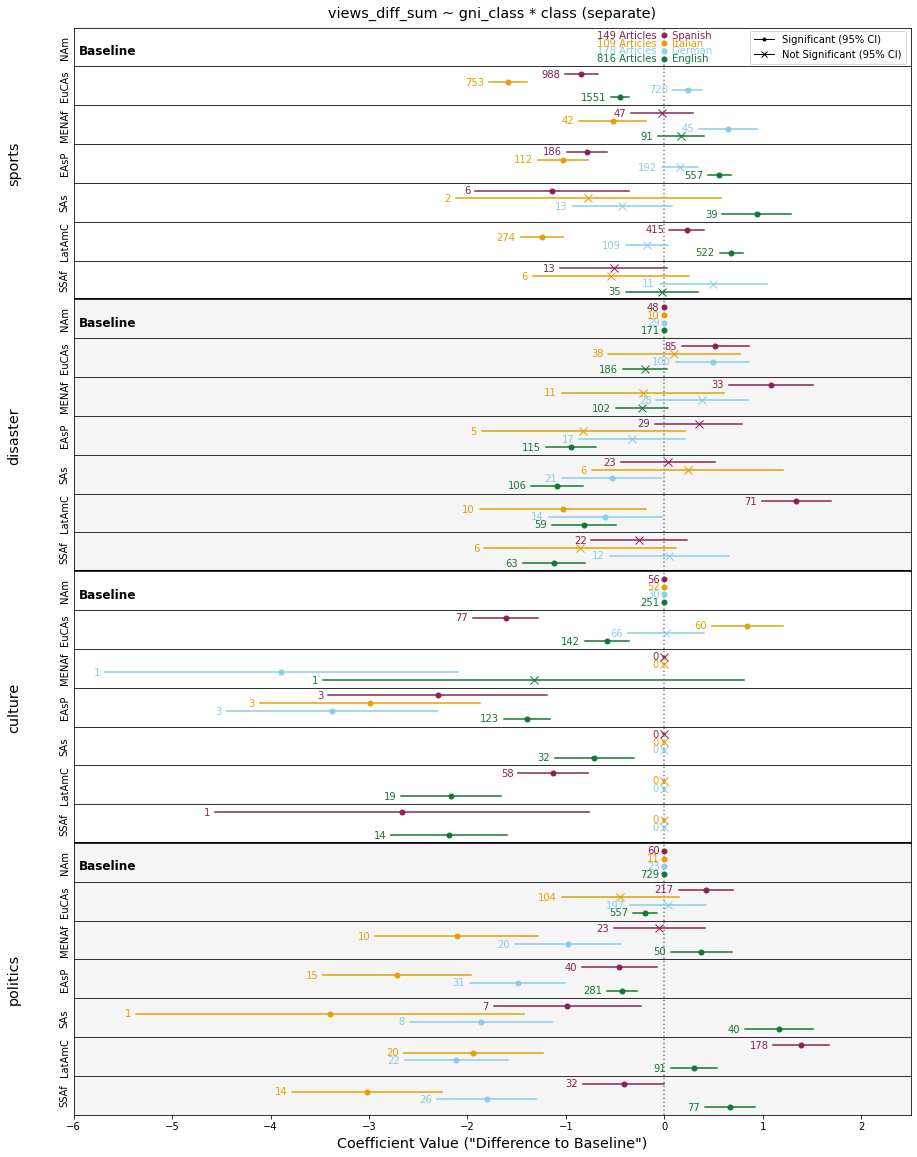

In [182]:
data_filtered_diff = data[(data.views_diff_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_diff = fit_regression_and_rename_coeffs_by_cat(data_filtered_diff, formula="views_diff_sum ~ C(cat, Treatment(reference='sports')) * C(gni_region, Treatment(reference='North America'))")

fig_int_class_cat_diff = plot_regression_results_interactions_from_dict(data_filtered_diff,
                                                                        results_fit_separate_diff, ['cat:gni_region'],
                                                                    {'gni_class': 'H', 'in_code_lang': True,
                                                                     'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
                                                                    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                'cat': ['sports', 'disaster', 'culture', 'politics'], 'gni_region': ['North America', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
                                                                    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='views_diff_sum ~ gni_class * class (separate)',
                                                                    label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC',
                                                                                       'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm',
                                                                                       'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
                                                                    figsize=(15, 20), x_limits=(-6,2.5), include_counts=True)
fig_int_class_cat_diff.savefig('regression_plot_interaction_regioncat_counts_sep_diff.pdf')

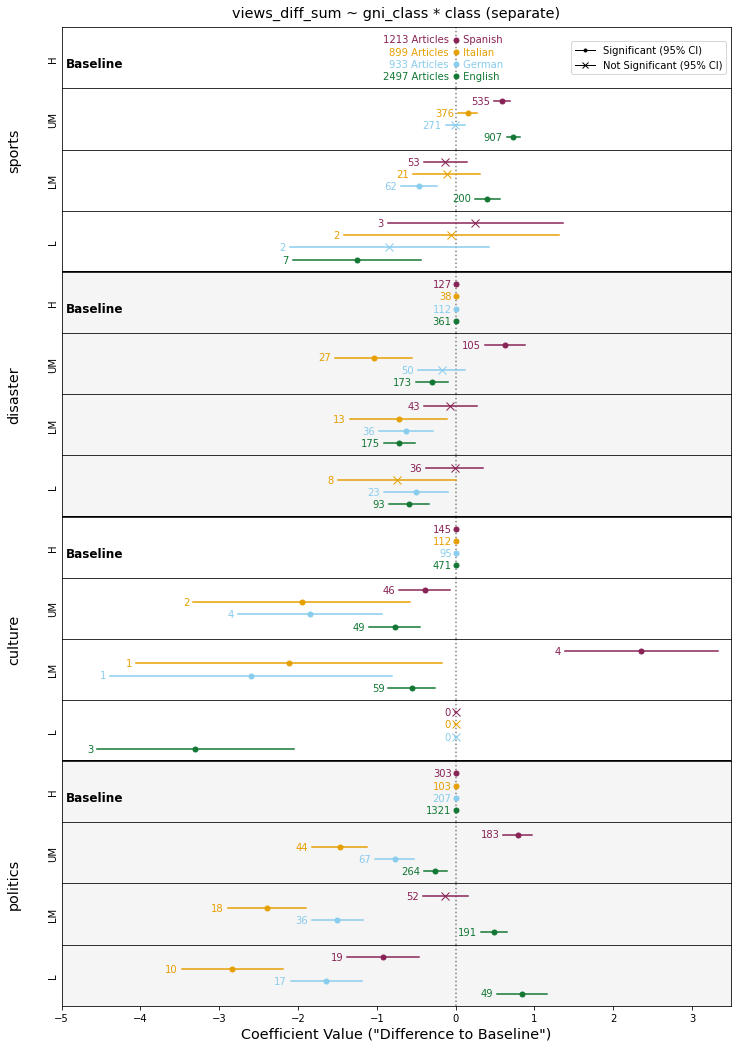

In [181]:
data_filtered_diff = data[(data.views_diff_sum > np.log1p(0)) & (data.views_diff_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_diff = fit_regression_and_rename_coeffs_by_cat(data_filtered_diff, formula="views_diff_sum ~ C(cat, Treatment(reference='sports')) * C(gni_class, Treatment(reference='H'))")

fig_int_class_cat_diff_sep = plot_regression_results_interactions_from_dict(data_filtered_diff,
                                                                            results_fit_separate_diff, ['cat:gni_class'],
                                                                            {'gni_class': 'H', 'in_code_lang': True,
                                                                             'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                                            label_sort={'gni_class': ['H', 'UM', 'LM', 'L'], 'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                                            cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='views_diff_sum ~ gni_class * class (separate)',
                                                                            figsize=(12, 18), x_limits=(-5,3.5), include_counts=True)
fig_int_class_cat_diff_sep.savefig('regression_plot_interaction_classcat_counts_sep_diff.pdf')

# Edits
Try and capture relation between edits vs. views?

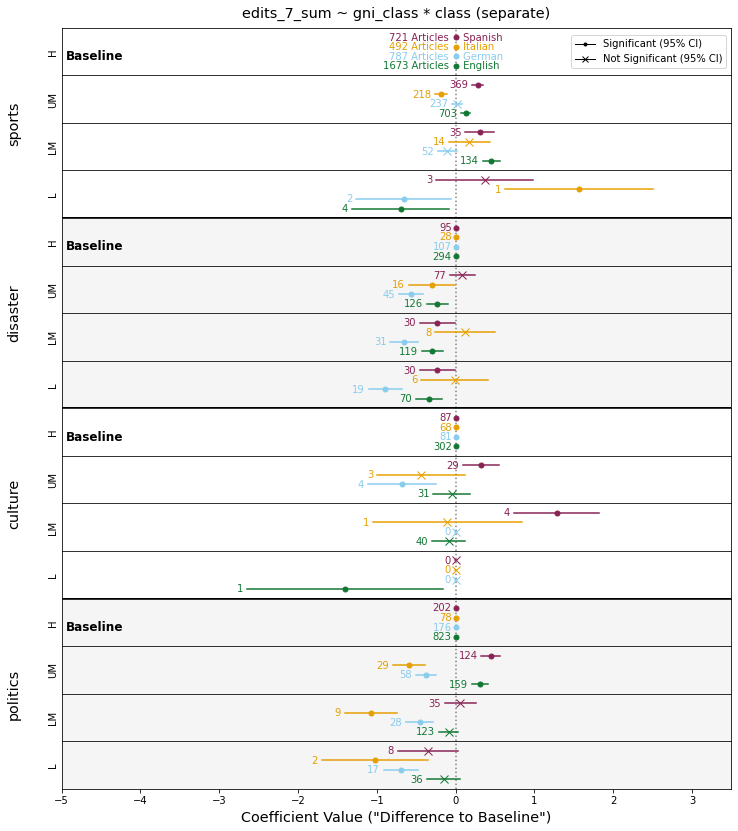

In [180]:
data_filtered_edits = data[(data.edits_7_sum >= np.log1p(3)) & (data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_edits = fit_regression_and_rename_coeffs_by_cat(data_filtered_edits, formula="edits_7_sum ~ C(cat, Treatment(reference='sports')) * C(gni_class, Treatment(reference='H'))")

fig_int_class_cat_edits1 = plot_regression_results_interactions_from_dict(data_filtered_edits,
                                                                         results_fit_separate_edits, ['cat:gni_class'],
                                                                    {'gni_class': 'H', 'in_code_lang': True,
                                                                     'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                                    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                                    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='edits_7_sum ~ gni_class * class (separate)',
                                                                    figsize=(12, 14), x_limits=(-5,3.5), include_counts=True)
fig_int_class_cat_edits1.savefig('regression_plot_interaction_classcat_edits.pdf')

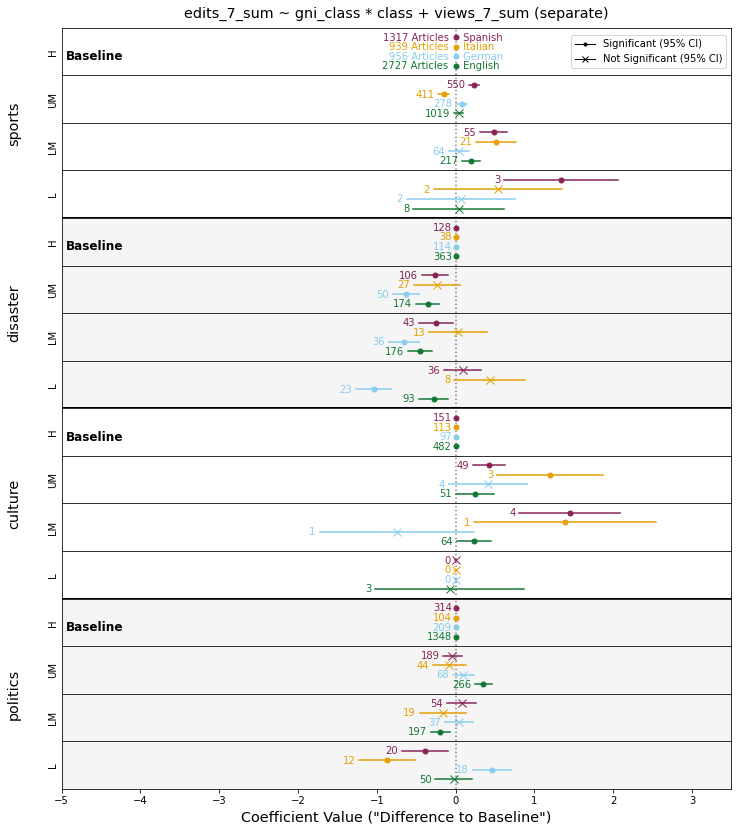

In [188]:
data_filtered_edits = data[(data.edits_7_sum >= np.log1p(3)) & (data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_edits_control = fit_regression_and_rename_coeffs_by_cat(data_filtered, formula="edits_7_sum ~ C(cat, Treatment(reference='sports')) * C(gni_class, Treatment(reference='H')) + views_7_sum")

fig_int_class_cat_edits_diff = plot_regression_results_interactions_from_dict(data_filtered,
                                                                         results_fit_separate_edits_control, ['cat:gni_class'],
                                                                         {'gni_class': 'H', 'in_code_lang': True,
                                                                          'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                                         label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                     'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                                         cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='edits_7_sum ~ gni_class * class + views_7_sum (separate)',
                                                                         figsize=(12, 14), x_limits=(-5,3.5), include_counts=True)
fig_int_class_cat_edits_diff.savefig('regression_plot_interaction_classcat_edits_control.pdf')

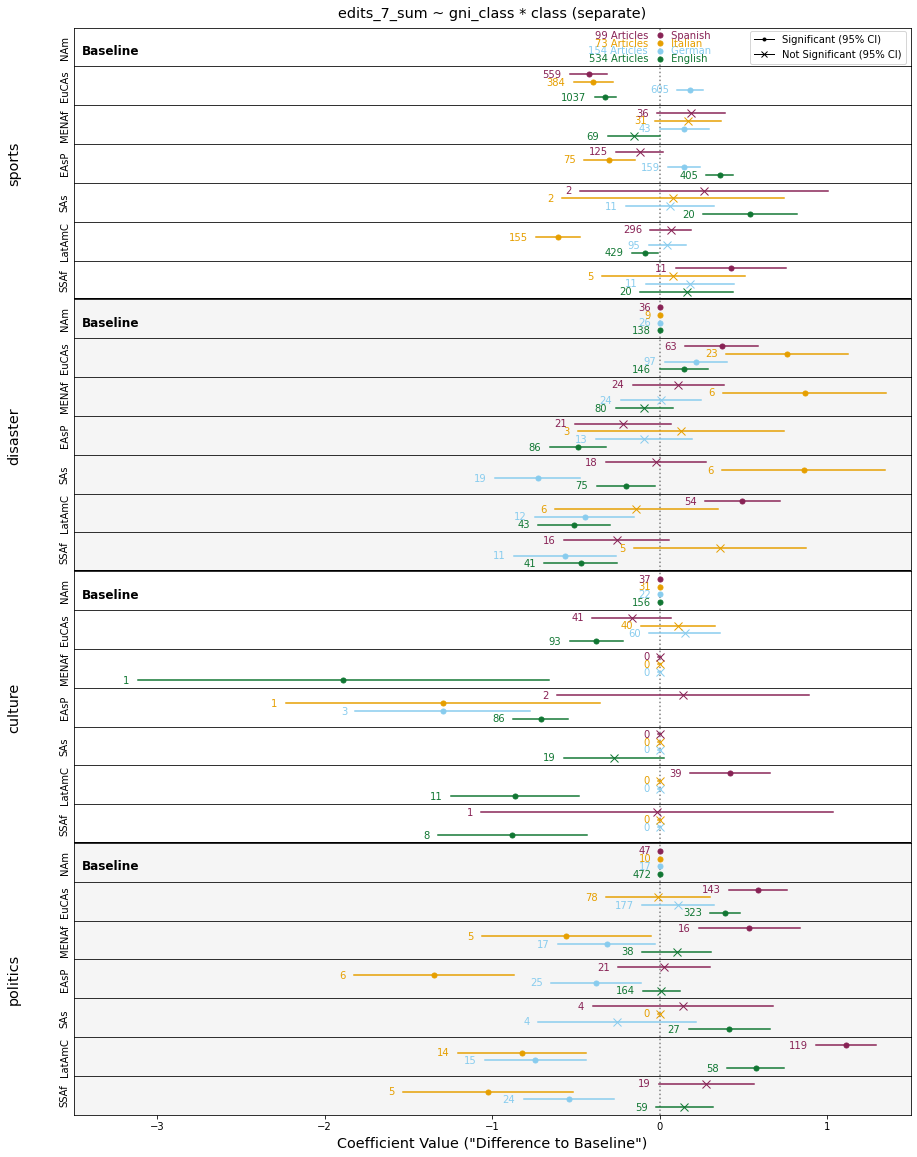

In [191]:
data_filtered_edits = data[(data.edits_7_sum >= np.log1p(3)) & (data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_edits = fit_regression_and_rename_coeffs_by_cat(data_filtered_edits, formula="edits_7_sum ~ C(cat, Treatment(reference='sports'))  * C(gni_region, Treatment(reference='North America'))")

fig_int_region_cat_diff = plot_regression_results_interactions_from_dict(data_filtered_edits,
                                                                        results_fit_separate_edits, ['cat:gni_region'],
                                                                        {'gni_class': 'H', 'in_code_lang': True,
                                                                         'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
                                                                        label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                    'cat': ['sports', 'disaster', 'culture', 'politics'], 'gni_region': ['North America', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
                                                                        cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='edits_7_sum ~ gni_class * class (separate)',
                                                                        label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC',
                                                                                           'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm',
                                                                                           'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
                                                                        figsize=(15, 20), x_limits=(-3.5,1.5), include_counts=True)

fig_int_region_cat_diff.savefig('regression_plot_interaction_regioncat_edits.pdf')

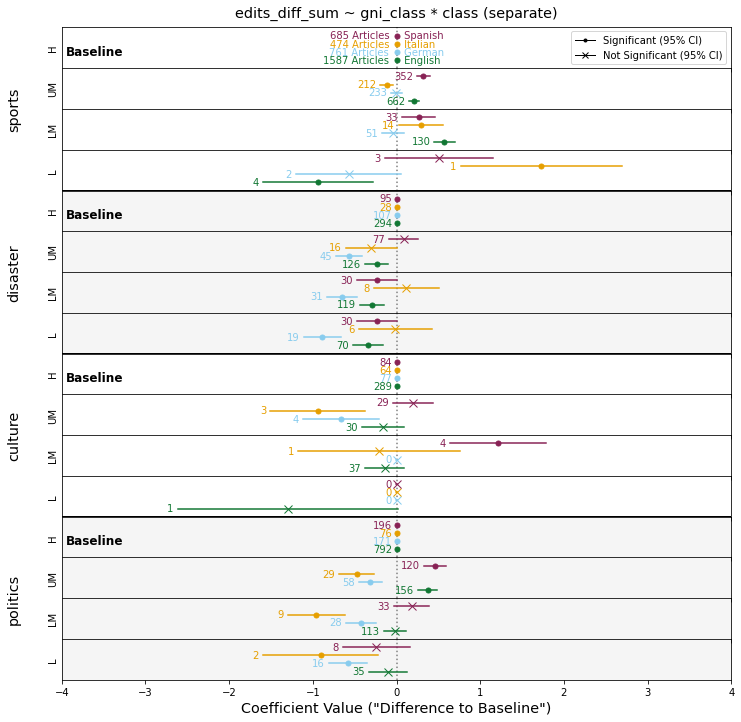

In [187]:
data_filtered_edits_diff = data[(data.edits_diff_sum >= np.log1p(0)) & (data.edits_7_sum >= np.log1p(3)) & (data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')]
results_fit_separate_edits_diff = fit_regression_and_rename_coeffs_by_cat(data_filtered_edits_diff, formula="edits_diff_sum ~ C(cat, Treatment(reference='sports')) *  C(gni_class, Treatment(reference='H'))")

fig_int_class_cat_edits_diff = plot_regression_results_interactions_from_dict(data_filtered_edits_diff,
                                                                              results_fit_separate_edits_diff, ['cat:gni_class'],
                                                                         {'gni_class': 'H', 'in_code_lang': True,
                                                                          'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                                         label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                                     'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                                         cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'}, title='edits_diff_sum ~ gni_class * class (separate)',
                                                                         figsize=(12, 12), x_limits=(-4,4), include_counts=True)
fig_int_class_cat_edits_diff.savefig('regression_plot_interaction_classcat_edits_diff.pdf')

In [156]:
print(data.code.value_counts(), data.code.value_counts().sum())
print(data_filtered.code.value_counts(), data_filtered.code.value_counts().sum())
print(data_filtered_diff.code.value_counts(), data_filtered_diff.code.value_counts().sum())
print(data_filtered_edits.code.value_counts(), data_filtered_edits.code.value_counts().sum())
print(data_filtered_edits_diff.code.value_counts(), data_filtered_edits_diff.code.value_counts().sum())

en    7269
es    3033
de    1976
it    1799
Name: code, dtype: int64 14077
en    7237
es    3018
de    1956
it    1752
Name: code, dtype: int64 13963
en    6820
es    2867
de    1916
it    1674
Name: code, dtype: int64 13277
en    4638
es    1849
de    1644
it     973
Name: code, dtype: int64 9104
en    4445
es    1779
de    1603
it     943
Name: code, dtype: int64 8770


# From Regression:

In [33]:
from plot_regression import plot_cat_by_cat

In [82]:
print(data_filtered_diff.code.value_counts())
print(data_filtered.code.value_counts())

en    6820
es    2867
de    1916
it    1674
Name: code, dtype: int64
en    7237
es    3018
de    1956
it    1752
Name: code, dtype: int64


In [84]:
data_filtered_diff.gni_region.unique()

array(['South Asia', 'North America', 'East Asia & Pacific',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'Middle East & North Africa'],
      dtype=object)

In [90]:
df_crawled[(df_crawled.cat == 'culture') & (df_crawled.gni_region == 'Latin America & Caribbean')]

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region,views_diff_sum
1733,Q24261058,58th Ariel Awards,2016-05-28,Global South,Mexico,North America,culture,"['Category:2016 film awards', 'Category:2016 i...",1589,35.857143,...,Latin America & Caribbean,123333379,Mexico,2016,8744.535294,1.078493e+12,True,False,False,1338
3330,Q29917774,19th Annual Gardel Awards,2017-06-06,Global South,Argentina,South America,culture,"['Category:2017 music awards', 'Category:CS1 S...",206,6.285714,...,Latin America & Caribbean,44044811,Argentina,2017,14648.845969,6.436284e+11,False,False,False,162
3569,Q3070714,Morelia International Film Festival,2020-10-28,Global South,Mexico,North America,culture,['Category:All articles needing additional ref...,485,34.857143,...,Latin America & Caribbean,128932753,Mexico,2020,8325.571218,1.073439e+12,True,False,False,241
3595,Q30904418,59th Ariel Awards,2017-07-11,Global South,Mexico,North America,culture,"['Category:2017 film awards', 'Category:2017 i...",1794,13.857143,...,Latin America & Caribbean,124777326,Mexico,2017,9287.841557,1.158912e+12,True,False,False,1697
4511,Q48878794,Miss Brazil 2018,2018-05-26,Global South,Brazil,South America,culture,"['Category:2018 beauty pageants', 'Category:20...",1258,0.000000,...,Latin America & Caribbean,209469320,Brazil,2018,9151.381601,1.916934e+12,False,False,False,1258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14026,Q97579455,Anexo:Premios VOS de 2018,2018-01-29,Global South,Argentina,South America,culture,"['Categoría:Anexos:Premios de teatro', 'Catego...",67,5.285714,...,Latin America & Caribbean,44494502,Argentina,2018,11668.472390,5.176269e+11,False,True,False,30
14027,Q97579459,Anexo:Premios VOS de 2019,2019-01-28,Global South,Argentina,South America,culture,"['Categoría:Anexos:Premios de teatro', 'Catego...",35,3.000000,...,Latin America & Caribbean,44938712,Argentina,2019,9947.264856,4.454453e+11,False,True,False,14
14029,Q97584653,Anexo:Hell and Heaven 2020,2020-03-14,Global South,Mexico,North America,culture,['Categoría:Festivales de música de 2020'],123,28.000000,...,Latin America & Caribbean,128932753,Mexico,2020,8325.571218,1.073439e+12,True,True,False,39
14032,Q97629971,LXII edición de los Premios Ariel,2020-09-27,Global South,Mexico,North America,culture,"['Categoría:Premios Ariel', 'Categoría:Wikiped...",1163,44.714286,...,Latin America & Caribbean,128932753,Mexico,2020,8325.571218,1.073439e+12,True,True,False,850


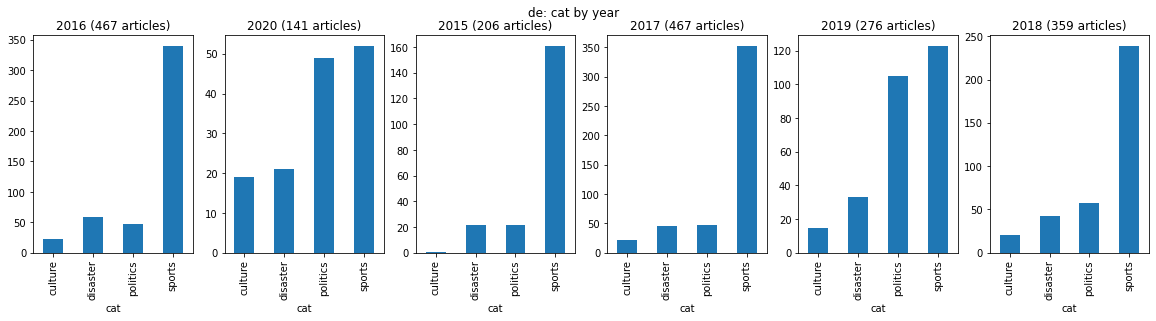

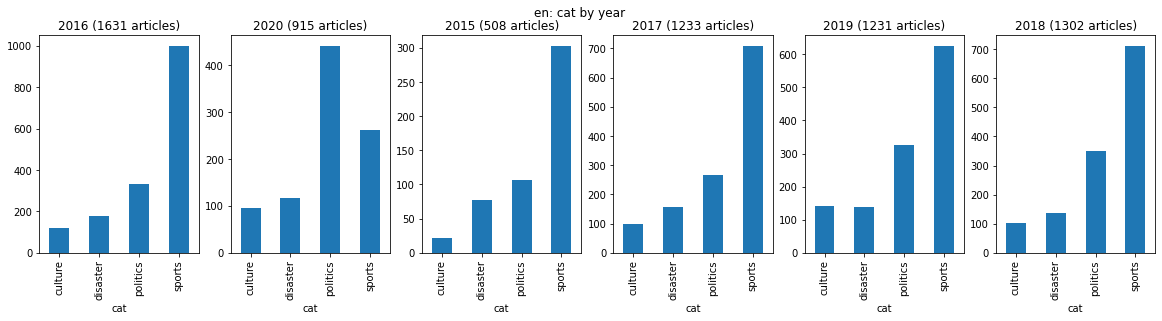

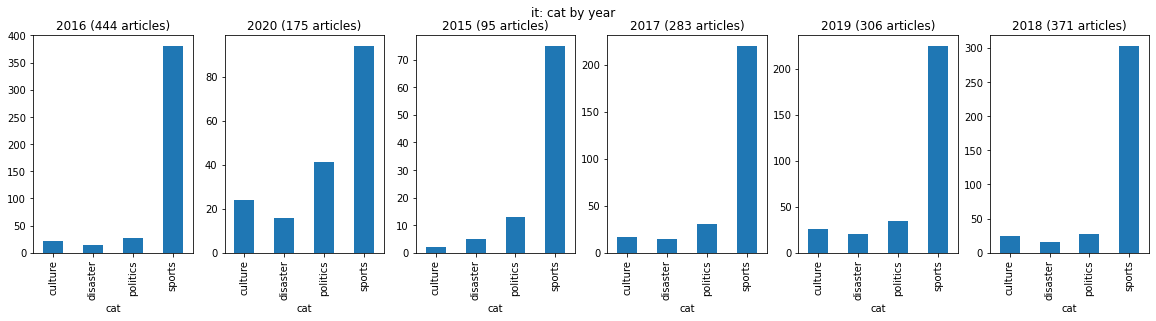

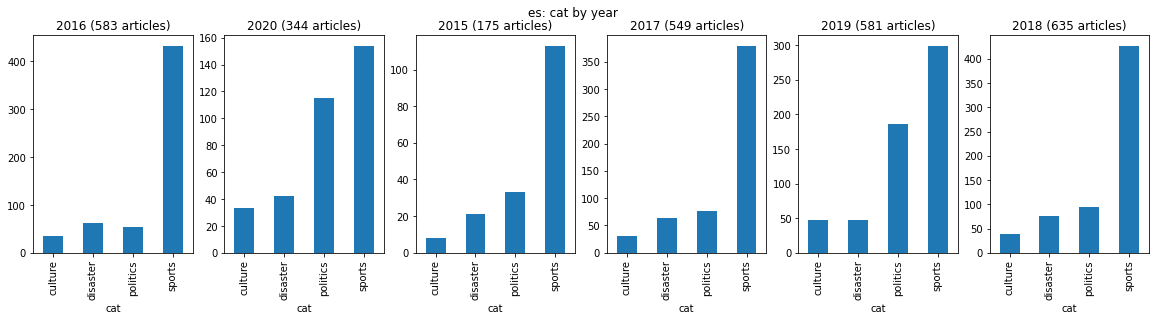

In [78]:
plot_cat_by_cat(data_filtered_diff, 'cat', 'year', figsize=(20,4))